In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly

Data collected from the [US Energy Information Administration](https://www.eia.gov), [National Centers for Environmental Information](https://www.ncei.noaa.gov), and [Kaiser Health News](https://www.kff.org/other/state-indicator/median-annual-income/?currentTimeframe=0&sortModel=%7B"colId":"Location","sort":"asc"%7D). See this [link](https://github.com/Masuma11/Machine-Learning-Project) for the premade datasets and an explanation of the data preprocessing steps. 

In [2]:
solar_generation=pd.read_excel('SOLAR_GEN.xlsx',index_col=0)
solar_generation.isna().sum().sum()

115

In [3]:
solar_prices=pd.read_excel('SOLAR_PRICES.xlsx',index_col=0)
solar_prices.isna().sum().sum()

0

In [4]:
all_prices=pd.read_excel('PRICES.xlsx',index_col=0)
all_prices.isna().sum().sum()

2

In [5]:
temperatures=pd.read_excel('TEMPERATURE.xlsx',index_col=0)
temperatures.isna().sum().sum()

0

In [16]:
politics=pd.read_excel('POLITICS.xlsx',index_col=0)
politics.isna().sum().sum()

0

In [10]:
income=pd.read_excel('INCOME.xlsx',index_col=0)
income.isna().sum().sum()

0

We can see that there are missing values in some of the dataframes so we can use the mean imputation method to fix that. 

In [14]:
solar_generation=solar_generation.fillna(solar_generation.mean())
all_prices=all_prices.fillna(all_prices.mean())


Now lets visualize all of the dataframes. Each colored line represents a unique state. 

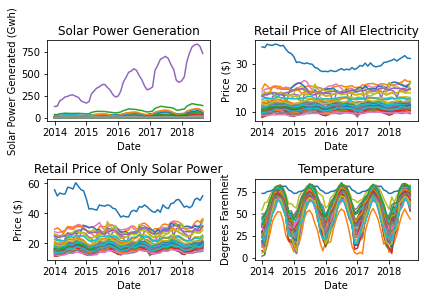

In [46]:
fig,ax=plt.subplots(2,2)
ax[0,0].plot(solar_generation)
ax[0,0].set_title('Solar Power Generation')
ax[0,0].set_xlabel('Date')
ax[0,0].set_ylabel('Solar Power Generated (Gwh)')
ax[0,1].plot(all_prices)
ax[0,1].set_title('Retail Price of All Electricity')
ax[0,1].set_xlabel('Date')
ax[0,1].set_ylabel('Price ($)')
ax[1,0].plot(solar_prices)
ax[1,0].set_title('Retail Price of Only Solar Power')
ax[1,0].set_xlabel('Date')
ax[1,0].set_ylabel('Price ($)')
ax[1,1].plot(temperatures)
ax[1,1].set_title('Temperature')
ax[1,1].set_xlabel('Date')
ax[1,1].set_ylabel('Degrees Farenheit')
plt.tight_layout()
plt.show()

There are some instances of the retail price of solar power dropping to $0 which is unreasonable in real life.

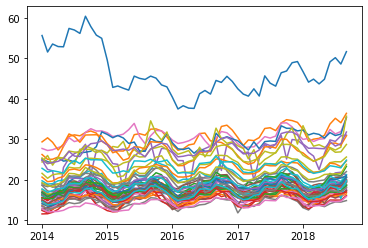

In [32]:
solar_prices=solar_prices.replace(0,solar_prices.mean())
plt.plot(solar_prices)
plt.show()

Now we can combine all of the dataframes into 1 dataframe for model construction. 

In [53]:
flat_solar_generation=solar_generation.values.flatten()
flat_all_prices=all_prices.values.flatten()
flat_solar_prices=solar_prices.values.flatten()
flat_temperatures=temperatures.values.flatten()
flat_politics=politics.values.flatten()
flat_income=income.values.flatten()
X=np.vstack([flat_solar_generation,flat_all_prices,flat_solar_prices,flat_temperatures,flat_politics,flat_income])
X=X.T
X.shape

(2850, 6)

Load in the label dataset...

In [63]:
y=pd.read_excel('Y_SWITCH.xlsx',index_col=0)
y.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
2014-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-02-01,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-03-01,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-04-01,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-05-01,0,0,0,0,1,1,1,1,1,0,...,0,0,0,1,1,1,0,0,0,0


In [64]:
y=y.values.flatten()
y.shape

(2850,)

Now we can try modelling. 

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [215]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
model=xgb.XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_pred,y_test)


0.9172510518934082

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       488
           1       0.88      0.86      0.87       225

    accuracy                           0.92       713
   macro avg       0.91      0.90      0.90       713
weighted avg       0.92      0.92      0.92       713



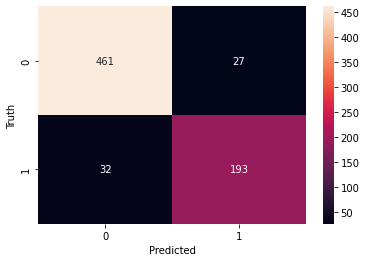

In [216]:
y_predicted=np.where(model.predict(X_test).flatten()>0.5,1,0)
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_predicted)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(classification_report(y_test,y_predicted))
plt.show()